# Sleep Analysis

Sleep analysis using data from the Samsung Galaxy Watch and Samsung Health App: https://www.samsung.com/ar/apps/samsung-health/#Sleep

How to download your personal data from Samsung Health: https://www.samsung.com/us/support/answer/ANS00085104/

## Load and Clean data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
columnas = ['physical_recovery', 
            'sleep_duration', 
            'original_wake_up_time', 
            'movement_awakening', 
            'original_bed_time',
            'sleep_cycle',
            'efficiency',
            'sleep_score', 
            'sleep_duration', 
            'com.samsung.health.sleep.start_time',
            'com.samsung.health.sleep.update_time',
            'com.samsung.health.sleep.create_time',
            'com.samsung.health.sleep.end_time',
            'com.samsung.health.sleep.time_offset']

df_sleep = pd.read_csv('data/sleep.csv', usecols=columnas, 
                       parse_dates=['original_wake_up_time',
                                    'original_bed_time',
                                    'com.samsung.health.sleep.start_time',
                                    'com.samsung.health.sleep.update_time',
                                    'com.samsung.health.sleep.create_time',
                                    'com.samsung.health.sleep.end_time'])

df_sleep.rename(columns=lambda x: x.replace('com.samsung.health.sleep.', ''), inplace=True)

## Sort data

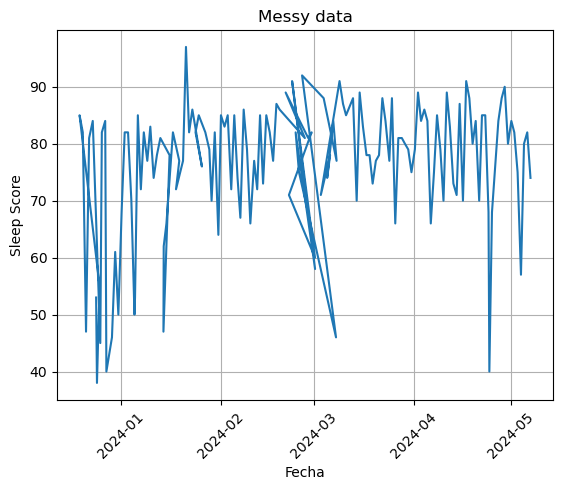

In [3]:
plt.plot(df_sleep['start_time'], df_sleep['sleep_score'])
plt.xlabel('Fecha')
plt.ylabel('Sleep Score')
plt.title('Messy data')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [4]:
# check if data is out of order
is_sorted_increasing = df_sleep['start_time'].is_monotonic_increasing
is_sorted_decreasing = df_sleep['start_time'].is_monotonic_decreasing
print("is_sorted_increasing", is_sorted_increasing)
print("is_sorted_decreasing", is_sorted_decreasing)
# Find where the monotony is broken in the 'start_time' column
# If they both return False, it is because they are not ordered correctly
# If they are not sorted, I sort them according to start_time
if not is_sorted_increasing and not is_sorted_decreasing:
    df_sleep = df_sleep.sort_values(by='start_time')
    

is_sorted_increasing False
is_sorted_decreasing False


## Apply time offset

In [5]:
columnas_datetime = ['original_wake_up_time', 'original_bed_time', 'start_time', 'update_time', 'create_time', 'end_time']

# the dataset has different time_offset
# so the function below is to format them to the exact time

# Function to adjust the columns according to the time offset
def ajustar_columnas_por_offset(row):
    offset = row['time_offset']
    if '+' in offset:
        hours = -int(offset.split('+')[1][:2])
    elif '-' in offset:
        hours = int(offset.split('-')[1][:2])
    else:
        hours = 0
    return row[columnas_datetime] - pd.Timedelta(hours=hours)

# Apply the function to each row to adjust the columns based on the offset
df_sleep[columnas_datetime] = df_sleep.apply(ajustar_columnas_por_offset, axis=1)

## Data Visualization

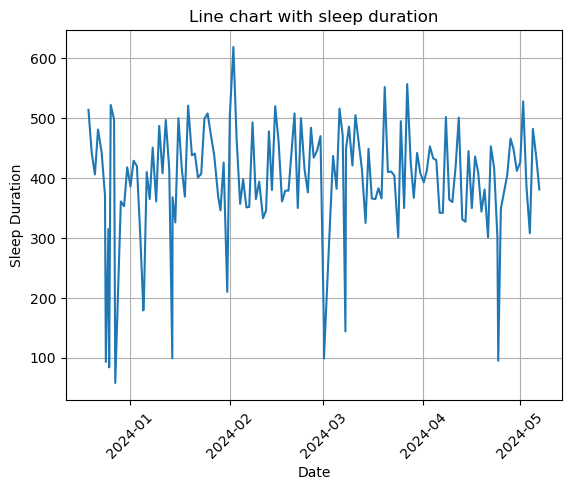

In [6]:
plt.plot(df_sleep['start_time'], df_sleep['sleep_duration'])
plt.xlabel('Date')
plt.ylabel('Sleep Duration')
plt.title('Line chart with sleep duration')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Looking for correlations

Correlation matrix:
                    physical_recovery  sleep_duration  movement_awakening  \
physical_recovery            1.000000        0.788436           -0.089949   
sleep_duration               0.788436        1.000000            0.134938   
movement_awakening          -0.089949        0.134938            1.000000   
sleep_cycle                  0.575639        0.673681           -0.044331   
efficiency                   0.116896       -0.022682           -0.886722   
sleep_score                  0.782855        0.772259           -0.213076   

                    sleep_cycle  efficiency  sleep_score  
physical_recovery      0.575639    0.116896     0.782855  
sleep_duration         0.673681   -0.022682     0.772259  
movement_awakening    -0.044331   -0.886722    -0.213076  
sleep_cycle            1.000000    0.141264     0.550241  
efficiency             0.141264    1.000000     0.242647  
sleep_score            0.550241    0.242647     1.000000  


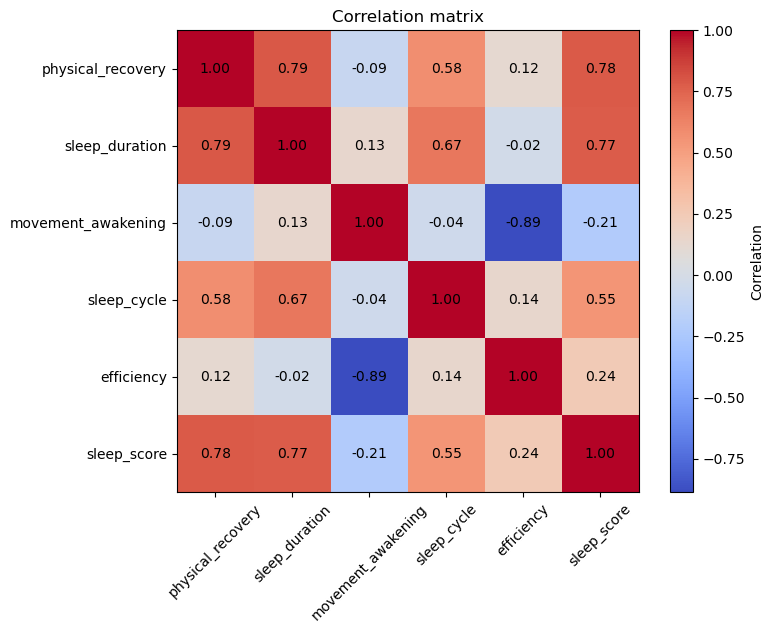

In [9]:
columnas_deseadas = ['physical_recovery', 'sleep_duration','movement_awakening', 'sleep_cycle', 'efficiency', 'sleep_score']
df_seleccionado = df_sleep[columnas_deseadas]

correlation_matrix = df_seleccionado.corr()

print("Correlation matrix:")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
heatmap = plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(heatmap, label='Correlation')
plt.title('Correlation matrix')
plt.xticks(ticks=range(len(columnas_deseadas)), labels=columnas_deseadas, rotation=45)
plt.yticks(ticks=range(len(columnas_deseadas)), labels=columnas_deseadas)

for i in range(len(columnas_deseadas)):
    for j in range(len(columnas_deseadas)):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='black')

plt.show()

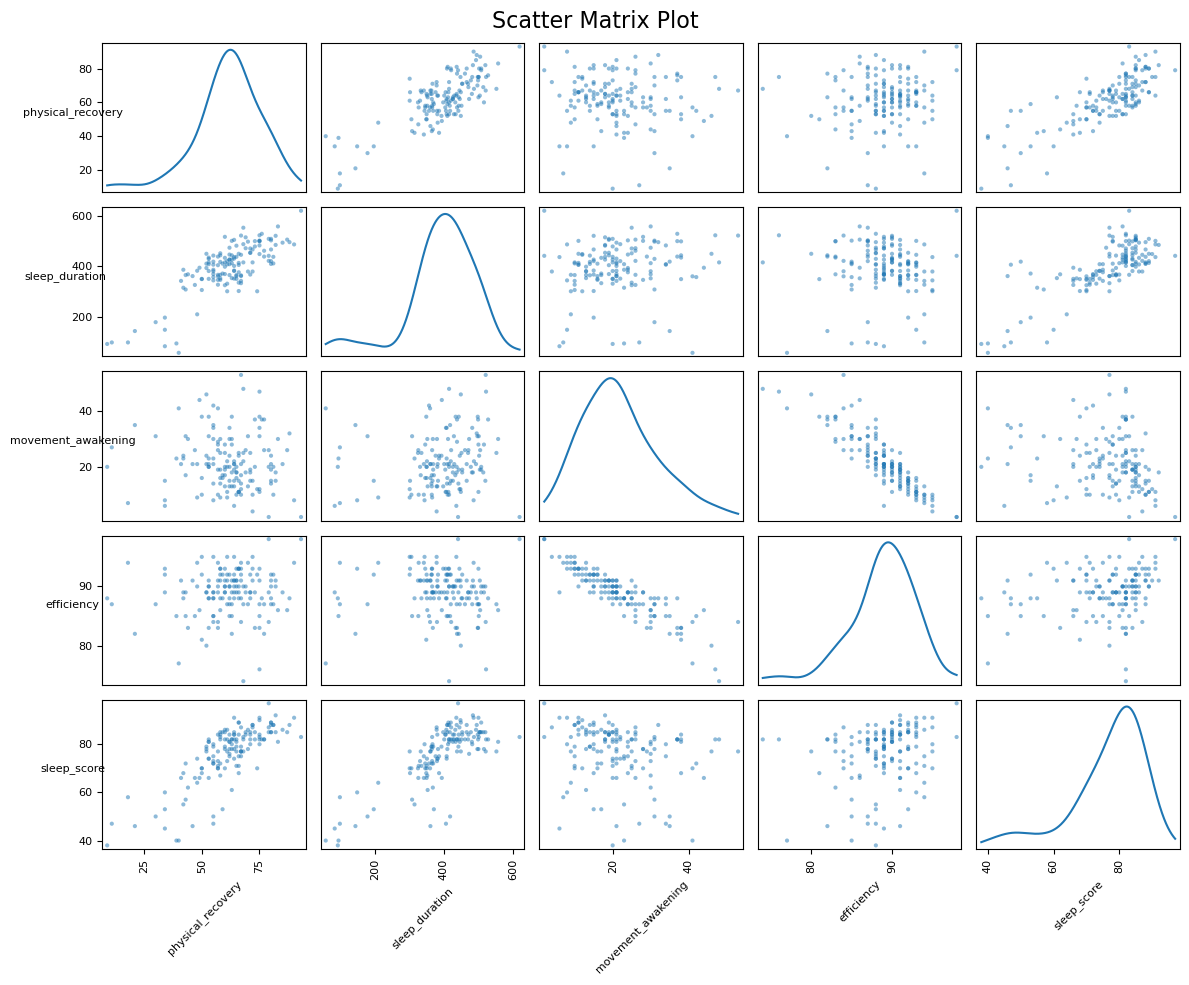

In [10]:
columnas_deseadas = ['physical_recovery', 'sleep_duration', 'movement_awakening', 'efficiency', 'sleep_score']
df_seleccionado = df_sleep[columnas_deseadas]

scatter_matrix = pd.plotting.scatter_matrix(df_seleccionado, figsize=(12, 10), diagonal='kde')

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=45)
    ax.set_ylabel(ax.get_ylabel(), fontsize=8, rotation=0)

plt.suptitle('Scatter Matrix Plot', fontsize=16)
plt.tight_layout()
plt.show()

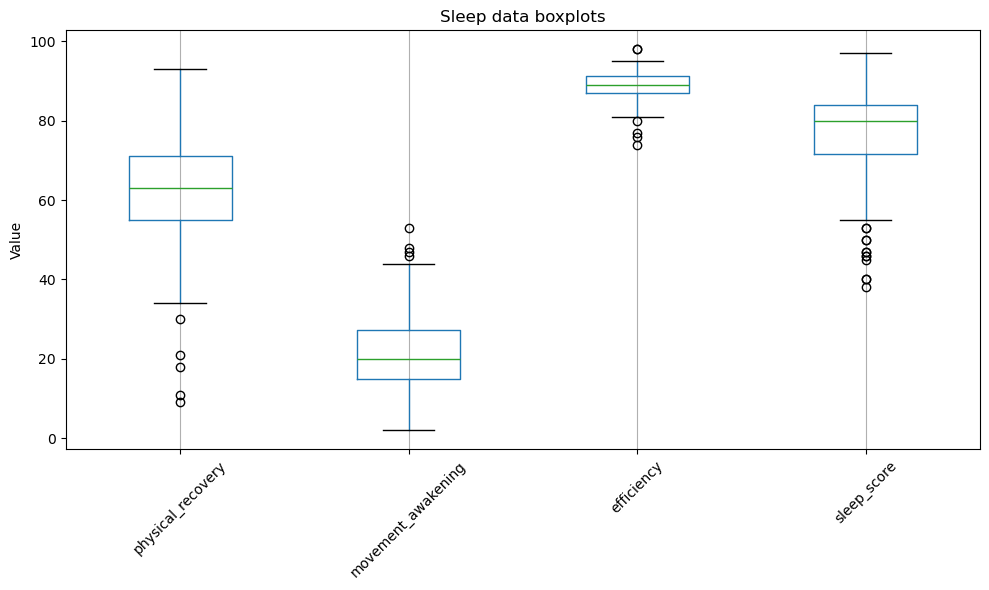

In [12]:
columnas_deseadas = ['physical_recovery', 'movement_awakening', 'efficiency', 'sleep_score']
df_seleccionado = df_sleep[columnas_deseadas]

plt.figure(figsize=(10, 6))
df_seleccionado.boxplot()
plt.title('Sleep data boxplots')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

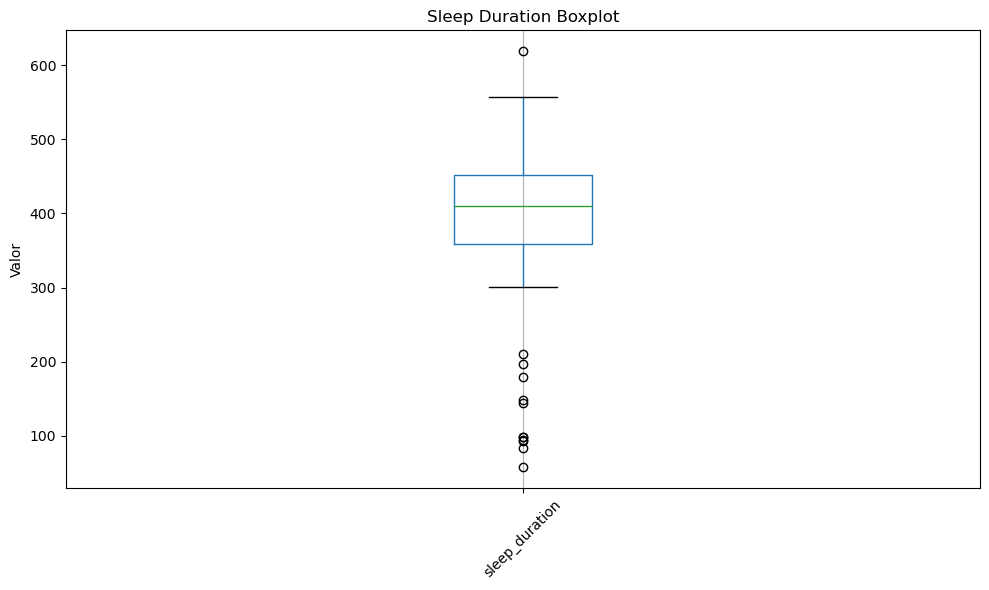

In [13]:
columnas_deseadas = ['sleep_duration']
df_seleccionado = df_sleep[columnas_deseadas]

plt.figure(figsize=(10, 6))
df_seleccionado.boxplot()
plt.title('Sleep Duration Boxplot')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Data transformation

In [14]:
df_sleep['hora'] = df_sleep['start_time'].dt.hour
df_sleep['hora'].value_counts()

hora
0     44
1     36
23    20
2     16
3     10
22     5
4      3
5      2
6      2
11     1
10     1
8      1
7      1
19     1
21     1
Name: count, dtype: int64

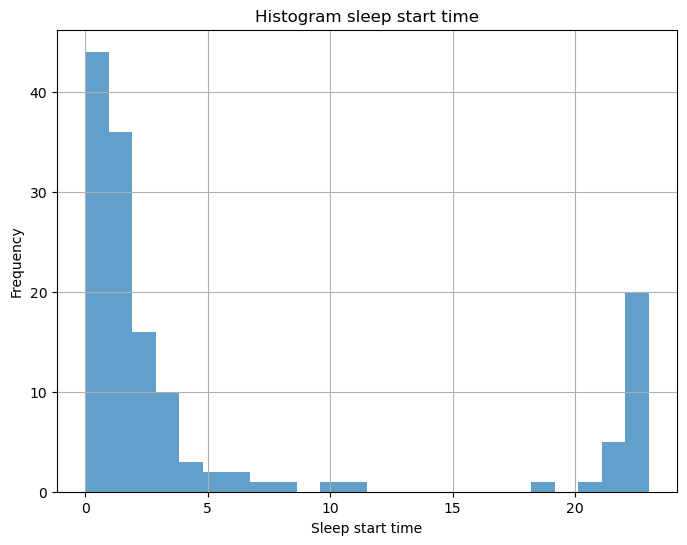

In [15]:
plt.figure(figsize=(8, 6))
plt.hist(df_sleep['hora'], bins=24, alpha=0.7)
plt.xlabel('Sleep start time')
plt.ylabel('Frequency')
plt.title('Histogram sleep start time')
plt.grid(True)
plt.show()


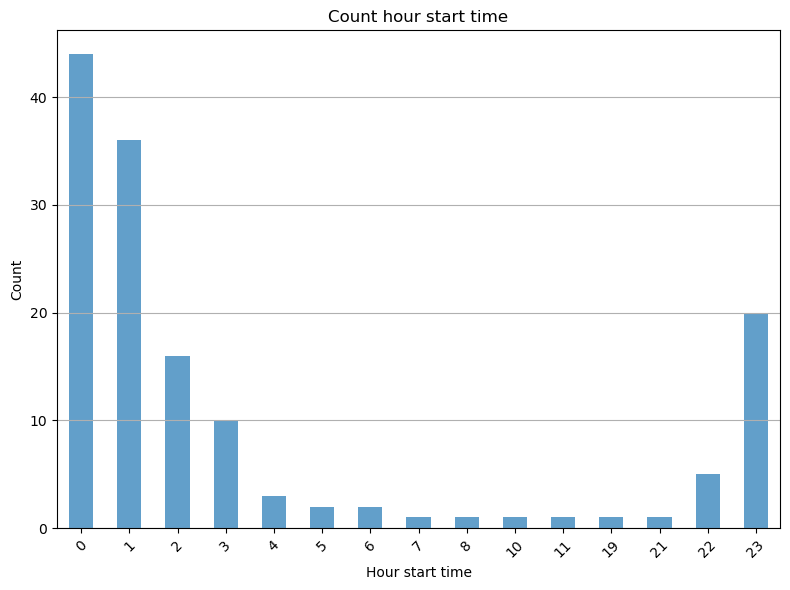

In [16]:
plt.figure(figsize=(8, 6))
df_sleep['hora'].value_counts().sort_index().plot(kind='bar', alpha=0.7)
plt.xlabel('Hour start time')
plt.ylabel('Count')
plt.title('Count hour start time')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [17]:
df_sleep['hora_end'] = df_sleep['end_time'].dt.hour
df_sleep['hora_end'].value_counts()

hora_end
7     37
8     36
6     26
9     24
10     5
5      5
11     4
4      3
12     1
3      1
13     1
21     1
Name: count, dtype: int64

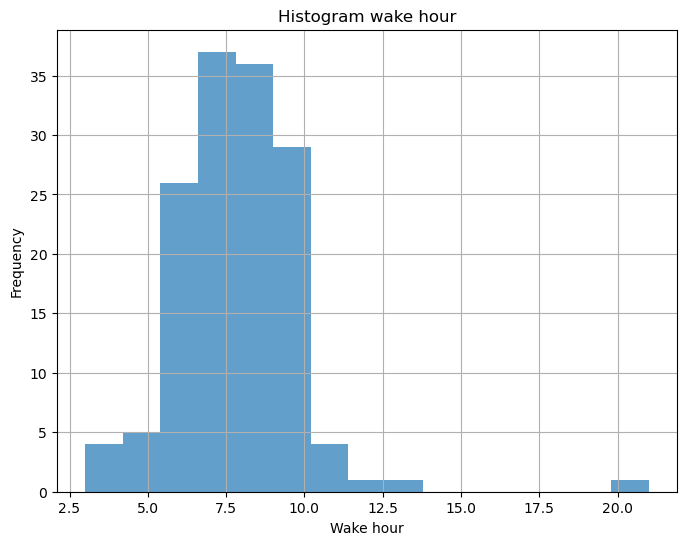

In [18]:
plt.figure(figsize=(8, 6))
plt.hist(df_sleep['hora_end'], bins=15, alpha=0.7)
plt.xlabel('Wake hour')
plt.ylabel('Frequency')
plt.title('Histogram wake hour')
plt.grid(True)
plt.show()


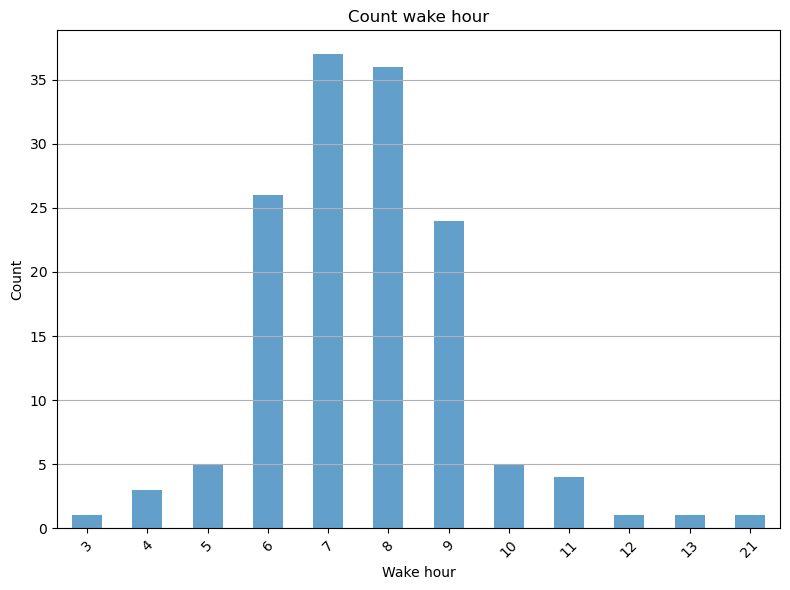

In [19]:
plt.figure(figsize=(8, 6))
df_sleep['hora_end'].value_counts().sort_index().plot(kind='bar', alpha=0.7)
plt.xlabel('Wake hour')
plt.ylabel('Count')
plt.title('Count wake hour')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [20]:
def asignar_valor(score):
    if score < 10:
        return 0
    elif score < 20:
        return 1
    elif score < 30:
        return 2
    elif score < 40:
        return 3
    elif score < 50:
        return 4
    elif score < 60:
        return 5
    elif score < 70:
        return 6
    elif score < 80:
        return 7
    elif score < 90:
        return 8
    else:
        return 9

df_sleep['score'] = df_sleep['sleep_score'].apply(asignar_valor)
df_sleep['score']

3      8
4      8
5      4
6      8
7      8
      ..
139    7
140    5
141    8
142    8
143    7
Name: score, Length: 144, dtype: int64

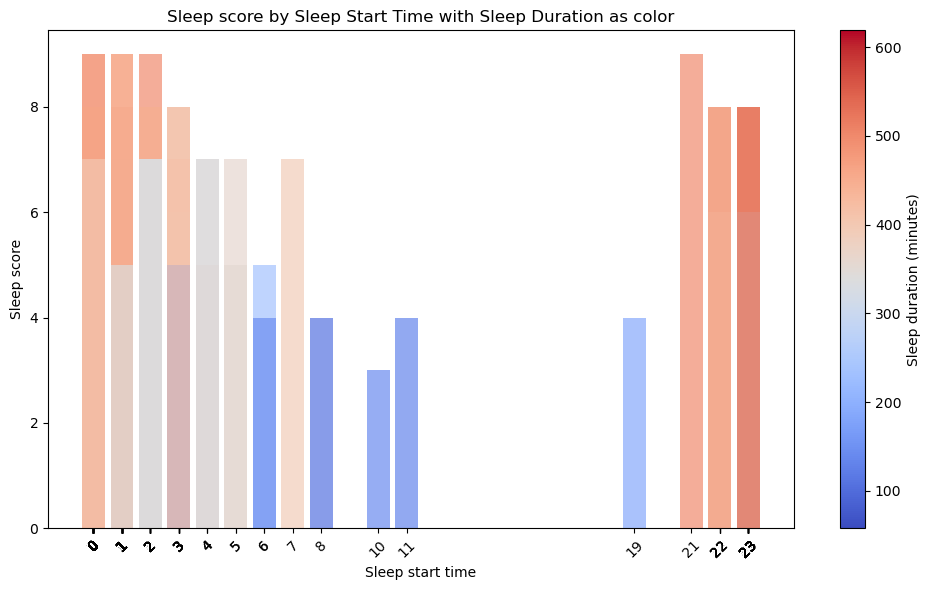

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(df_sleep['hora'], df_sleep['score'], alpha=0.7, color=plt.cm.coolwarm(df_sleep['sleep_duration'] / df_sleep['sleep_duration'].max()))

sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=df_sleep['sleep_duration'].min(), vmax=df_sleep['sleep_duration'].max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, label='Sleep duration (minutes)')

ax.set_xlabel('Sleep start time')
ax.set_ylabel('Sleep score')
ax.set_title('Sleep score by Sleep Start Time with Sleep Duration as color')
ax.set_xticks(df_sleep['hora'])
ax.set_xticklabels(df_sleep['hora'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [26]:
df_sleep['hora'].value_counts()

hora
0     44
1     36
23    20
2     16
3     10
22     5
4      3
5      2
6      2
11     1
10     1
8      1
7      1
19     1
21     1
Name: count, dtype: int64

In [ ]:
# Function to adjust the columns according to the time offset
def ajustar_columnas_por_offset(row):
    offset = row['time_offset']
    if '+' in offset:
        hours = -int(offset.split('+')[1][:2])
    elif '-' in offset:
        hours = int(offset.split('-')[1][:2])
    else:
        hours = 0
    return row[columnas_datetime] - pd.Timedelta(hours=hours)

# Apply the function to each row to adjust the columns based on the offset
df_sleep[columnas_datetime] = df_sleep.apply(ajustar_columnas_por_offset, axis=1)